In [366]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree

In [367]:
def data_results(testing_classes, testing_inputs, alg_class):
    cm_display = ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix(testing_classes, alg_class.predict(testing_inputs))
    )

    cm_display.plot()
    plt.xticks([0, 1], ["No", "Yes"])
    plt.yticks([0, 1], ["No", "Yes"])
    plt.xlabel('Predicted Entry')
    plt.ylabel('Actual Entry')
    plt.show()

    print(classification_report(testing_classes, alg_class.predict(testing_inputs)))

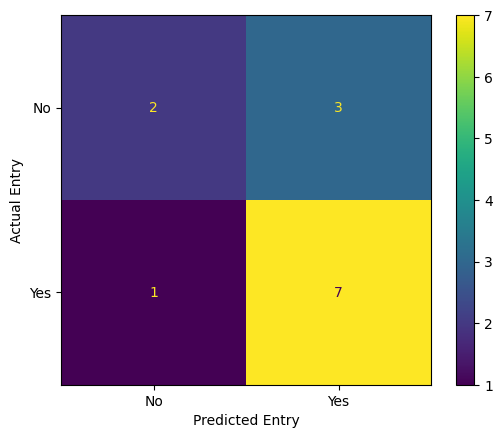

              precision    recall  f1-score   support

           N       0.67      0.40      0.50         5
           Y       0.70      0.88      0.78         8

    accuracy                           0.69        13
   macro avg       0.68      0.64      0.64        13
weighted avg       0.69      0.69      0.67        13



[Text(0.38333333333333336, 0.9705882352941176, 'Attacking Score <= 13.525\ngini = 0.49\nsamples = 98\nvalue = [42, 56]'),
 Text(0.3388888888888889, 0.9117647058823529, 'won <= 20.5\ngini = 0.5\nsamples = 83\nvalue = [42, 41]'),
 Text(0.20555555555555555, 0.8529411764705882, 'won <= 7.5\ngini = 0.494\nsamples = 72\nvalue = [40, 32]'),
 Text(0.16111111111111112, 0.7941176470588235, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.25, 0.7941176470588235, 'Attacking Score <= 7.687\ngini = 0.498\nsamples = 68\nvalue = [36, 32]'),
 Text(0.20555555555555555, 0.7352941176470589, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.29444444444444445, 0.7352941176470589, 'Attacking Score <= 9.402\ngini = 0.5\nsamples = 65\nvalue = [33, 32]'),
 Text(0.13333333333333333, 0.6764705882352942, 'Defensive Score <= 3.41\ngini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(0.08888888888888889, 0.6176470588235294, 'won <= 9.0\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.044444444444444446, 0.5

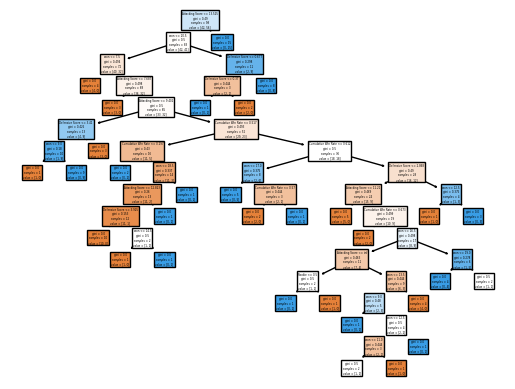

In [368]:
df_teams = pd.read_csv('dataset/processed/teams_test.csv')
df_teams = df_teams.sort_values(by=['franchID', 'year'])
df_teams['playoffNextYear'] = df_teams['playoff'].shift(-1)
df_teams.loc[df_teams['franchID'] != df_teams['franchID'].shift(-1), 'playoffNextYear'] = None
df_teams.dropna(subset=['playoffNextYear'], inplace=True)
#df_teams["confW"] = df_teams["confW"].fillna(0)
#df_teams = df_teams.fillna(-1)

label_encoder = LabelEncoder()
df_teams['playoff'] = label_encoder.fit_transform(df_teams['playoff'])

features = ['won', 'playoff', 'Attacking Score', 'Defensive Score', 'Cumulative Win Rate', 'Rookie'] # attend?

df_teams_train = df_teams[df_teams['year'] <= 7]
df_teams_test = df_teams[df_teams['year'].isin([8])]

# df_teams_train = df_teams[df_teams['year'] <= 5]
# df_teams_test = df_teams[df_teams['year'].isin([6])]

training_inputs = df_teams_train[features]
training_classes = df_teams_train['playoffNextYear']
testing_inputs = df_teams_test[features]
testing_classes = df_teams_test['playoffNextYear']

dt_class = DecisionTreeClassifier(random_state=42)
dt_class.fit(training_inputs, training_classes)
# print(training_inputs.isna().sum())
dt_class.predict(testing_inputs)

dt_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, dt_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, dt_class)

plot_tree(dt_class, feature_names=features, filled=True)

[[0.37783333 0.62216667]
 [0.17       0.83      ]
 [0.202      0.798     ]
 [0.6895     0.3105    ]
 [0.81       0.19      ]
 [0.88       0.12      ]
 [0.93       0.07      ]
 [0.37666667 0.62333333]
 [0.7        0.3       ]
 [0.11       0.89      ]
 [0.785      0.215     ]
 [0.89       0.11      ]
 [0.15333333 0.84666667]
 [0.06783333 0.93216667]
 [0.12       0.88      ]
 [0.06       0.94      ]
 [0.03       0.97      ]
 [0.79       0.21      ]
 [0.69       0.31      ]
 [0.345      0.655     ]
 [0.14       0.86      ]
 [0.01       0.99      ]
 [0.15       0.85      ]
 [0.21       0.79      ]
 [0.         1.        ]
 [0.09       0.91      ]
 [0.18       0.82      ]
 [0.68       0.32      ]
 [0.06       0.94      ]
 [0.17       0.83      ]
 [0.75       0.25      ]
 [0.77166667 0.22833333]
 [0.32716667 0.67283333]
 [0.82       0.18      ]
 [0.86       0.14      ]
 [0.18583333 0.81416667]
 [0.1425     0.8575    ]
 [0.21       0.79      ]
 [0.         1.        ]
 [0.         1.        ]


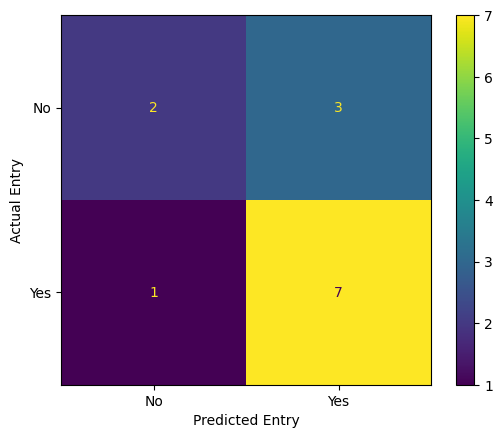

              precision    recall  f1-score   support

           N       0.67      0.40      0.50         5
           Y       0.70      0.88      0.78         8

    accuracy                           0.69        13
   macro avg       0.68      0.64      0.64        13
weighted avg       0.69      0.69      0.67        13



In [369]:
rf_class = RandomForestClassifier(n_estimators=100)
rf_class.fit(training_inputs, training_classes)

print(rf_class.predict_proba(training_inputs))

rf_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, rf_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, rf_class)

In [370]:
'''nb_class = GaussianNB()
nb_class.fit(training_inputs, training_classes)

nb_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, nb_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, nb_class)'''

'nb_class = GaussianNB()\nnb_class.fit(training_inputs, training_classes)\n\nnb_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, nb_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, nb_class)'

In [371]:
'''svm_class = SVC(kernel='rbf')
svm_class.fit(training_inputs, training_classes)

svm_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, svm_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, svm_class)'''

"svm_class = SVC(kernel='rbf')\nsvm_class.fit(training_inputs, training_classes)\n\nsvm_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, svm_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, svm_class)"

In [372]:
'''knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(training_inputs, training_classes)

knn_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, knn_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, knn_class)'''

'knn_class = KNeighborsClassifier(n_neighbors=5)\nknn_class.fit(training_inputs, training_classes)\n\nknn_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, knn_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, knn_class)'

In [373]:
'''ann_class = MLPClassifier(random_state=42, max_iter=300)
ann_class.fit(training_inputs, training_classes)

ann_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, ann_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, ann_class)'''

'ann_class = MLPClassifier(random_state=42, max_iter=300)\nann_class.fit(training_inputs, training_classes)\n\nann_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, ann_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, ann_class)'

In [374]:
'''ab_class = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42)
ab_class.fit(training_inputs, training_classes)

ab_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, ab_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, ab_class)'''

'ab_class = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42)\nab_class.fit(training_inputs, training_classes)\n\nab_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, ab_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, ab_class)'

In [375]:
'''for w in df_teams['confW']:
    print(w)
nan_count = df_teams['confW'].isna().sum()
print(nan_count)'''

#print(df_teams.isna().sum())

#df_teams.head(164)

df_teams.head(30)

,year,tmID,franchID,confID,rank,playoff,firstRound,semis,finals,name,...,awayL,confW,confL,min,Attacking Score,Defensive Score,coachID,Cumulative Win Rate,Rookie,playoffNextYear
0,9,ATL,ATL,EA,7,0,NaN,NaN,NaN,Atlanta Dream,...,14,2,18,6825,NaN,NaN,meadoma99w,NaN,True,Y
2,1,CHA,CHA,EA,8,0,NaN,NaN,NaN,Charlotte Sting,...,13,5,16,6475,NaN,NaN,dunntr01wc,NaN,True,Y
3,2,CHA,CHA,EA,4,1,W,W,L,Charlotte Sting,...,9,15,6,6500,10.057171,3.196100,donovan99w,0.281250,False,Y
4,3,CHA,CHA,EA,2,1,L,NaN,NaN,Charlotte Sting,...,9,12,9,6450,13.636453,0.407812,donovan99w,0.469375,False,Y
5,4,CHA,CHA,EA,2,1,L,NaN,NaN,Charlotte Sting,...,12,12,12,6850,9.960579,0.484320,laceytr99w,NaN,True,N
6,5,CHA,CHA,EA,5,0,NaN,NaN,NaN,Charlotte Sting,...,11,8,12,6900,12.530823,1.660838,laceytr99w,0.500000,False,N
7,6,CHA,CHA,EA,6,0,NaN,NaN,NaN,Charlotte Sting,...,16,4,16,6945,8.577624,2.834996,boguemu01w,NaN,True,N
9,7,CHI,CHI,EA,7,0,NaN,NaN,NaN,Chicago Sky,...,15,4,16,6800,NaN,NaN,cowenda01w,NaN,True,N
10,8,CHI,CHI,EA,6,0,NaN,NaN,NaN,Chicago Sky,...,9,6,14,6972,9.216573,3.460744,overtbo99w,NaN,True,N
11,9,CHI,CHI,EA,5,0,NaN,NaN,NaN,Chicago Sky,...,13,10,10,6875,10.634197,3.499492,keyst99wc,NaN,True,N
